# A text analysis of Oscar Wilde's 'Happy Prince and Other Tales'

## Yishu Yang

2019.8.19

Introduction to Computational Literary Analysis

UC-Berkeley, Summer 2019

Instructor: Jonathan Reeve

In [34]:
from nltk.corpus import gutenberg
from nltk.corpus import sentiwordnet as sw
import json
import nltk
import requests
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import spacy
import collections
%matplotlib inline

In [35]:
talesMetaUrl = "http://corpus-db.org/api/id/30120.0"
talesTextUrl = talesMetaUrl + "/fulltext"

In [36]:
response = requests.get(talesMetaUrl)
response.ok

True

In [37]:
talesMeta = json.loads(response.text)

In [38]:
response = requests.get(talesTextUrl)
response.ok

True

In [39]:
talesText = json.loads(response.text)

In [40]:
talesMeta.keys()

dict_keys(['lcsh', 'summary', 'series_note', 'creator', 'production_note', 'downloads', 'rights_url', 'wp_publication_date', 'authoryearofdeath', '_repo', 'wp_subjects', 'language_note', 'tableOfContents', 'gutenberg_issued', 'identifiers', 'formats', 'gutenberg_type', '', 'publication_note', 'url', 'edition_identifiers', 'rights', 'authoryearofbirth', 'wp_info', 'languages', 'LCC', 'publication_date', 'subjects', 'wikipedia', 'author', 'id', 'gutenberg_bookshelf', '_version', 'releaseDate', 'alternative_title', 'title', 'type', 'wp_literary_genres', 'contributor', 'edition_note', 'titlepage_image', 'jmdate', 'publisher', 'covers', 'description', 'filename'])

In [41]:
talesMeta['downloads']

'258'

In [42]:
tales = talesText[0]["text"].split("\n\n\n\n\n\n")[3].split("\n\n\n")

In [43]:
len(tales)

18

In [44]:
li = list(range(0,18))
print(li)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [45]:
talesList = [tales[i] for i in li]

In [46]:
[tale[:50] for tale in talesList]

['THE HAPPY PRINCE',
 'High above the city, on a tall column, stood the s',
 '       *       *       *       *       *',
 'THE NIGHTINGALE AND THE ROSE',
 '"She said that she would dance with me if I brough',
 '       *       *       *       *       *',
 'THE SELFISH GIANT',
 'Every afternoon, as they were coming from school, ',
 '       *       *       *       *       *',
 'THE DEVOTED FRIEND',
 'One morning the old Water-rat put his head out of ',
 '       *       *       *       *       *',
 'THE REMARKABLE ROCKET',
 "The King's son was going to be married, so there w",
 '\nPRINTED BY\nHAZELL, WATSON AND VINEY, LD.\nLONDON A',
 '\n\n       *       *       *       *       *',
 '\n\nErrors Noted by Transcriber:\n\n  "What a remarkab',
 '']

In [47]:
tales = []
titles = []
for i in [0, 3, 6, 9, 12]:
    tale = talesList[i] + talesList[i+1]
    title = talesList[i]
    tales.append(tale)
    titles.append(title)
[tale[:50] for tale in tales]

['THE HAPPY PRINCEHigh above the city, on a tall col',
 'THE NIGHTINGALE AND THE ROSE"She said that she wou',
 'THE SELFISH GIANTEvery afternoon, as they were com',
 'THE DEVOTED FRIENDOne morning the old Water-rat pu',
 "THE REMARKABLE ROCKETThe King's son was going to b"]

In [48]:
titles

['THE HAPPY PRINCE',
 'THE NIGHTINGALE AND THE ROSE',
 'THE SELFISH GIANT',
 'THE DEVOTED FRIEND',
 'THE REMARKABLE ROCKET']

In [49]:
[len(tale) for tale in tales]

[18557, 12230, 8734, 22788, 23803]

In [50]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, 
                        max_df=0.7, stop_words='english')

In [51]:
tfMatrix = tfidf.fit_transform(tales)
words = tfidf.get_feature_names()

In [52]:
tfMatrix.shape

(5, 1870)

In [53]:
pca = PCA(n_components=2)
pcaOut = pca.fit_transform(tfMatrix.todense())

In [54]:
df = pd.DataFrame(pcaOut, index=titles, columns=["C1", "C2"])

In [55]:
df

,C1,C2
THE HAPPY PRINCE,-0.319927,-0.072431
THE NIGHTINGALE AND THE ROSE,-0.354526,0.047157
THE SELFISH GIANT,0.151092,0.808513
THE DEVOTED FRIEND,0.817755,-0.322974
THE REMARKABLE ROCKET,-0.294394,-0.460265


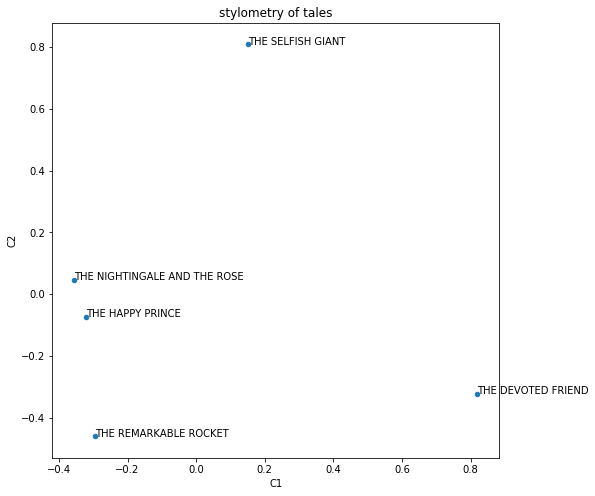

In [56]:
ax = df.plot(x=0, y=1, kind="scatter", figsize=(8, 8), title = "stylometry of tales")
for x, y in df.iterrows():
    ax.annotate(x, y)

Introduction: 

The tales of Oscar Wilde have never been out of date. In accordance with his ideas of aestheticism, the collection of his fairy tales stands out among works of that era. This project aims to explore the unique content and style of Wilde’s first fairy tale collection with some methods of Python text analysis.

First, I used the PCA to analyze the stylometry of these five tales. Obviously, "The Happy Prince" and "The Nightingale and The Rose" are closest to each other. The reason may be the protagonists of these two tales are both a human(or a human sculpture) and a bird, while Devoted Friend talks about hypocrisy of human friendship, The Remarkable Rocket focuses on an object, and The Selfish Garden is a story of a giant being transformed by Jesus.

In [57]:
def plotAcrossStories(wordList):
    counts = {}
    for title, tale in zip(titles, tales): 
        tokens = nltk.word_tokenize(tale)
        counts[title] = {word: tokens.count(word)/len(tokens) for word in wordList}
    return counts

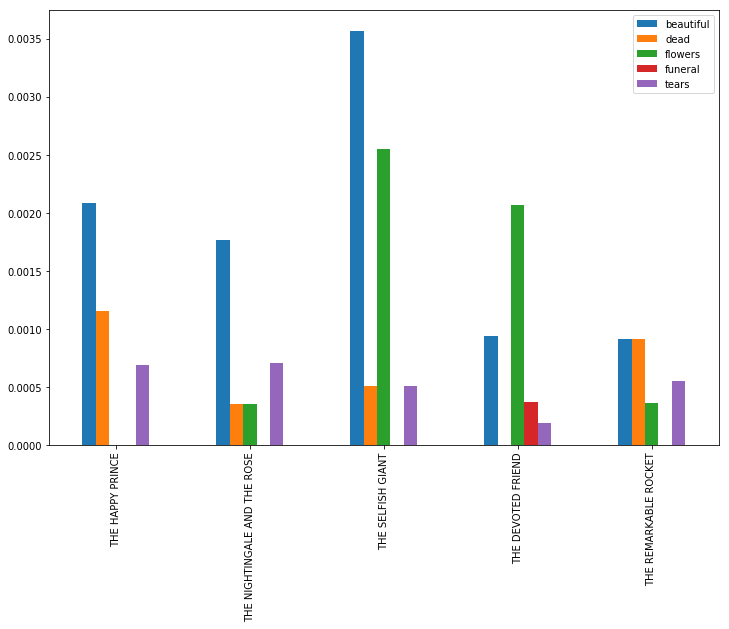

In [58]:
pd.DataFrame(plotAcrossStories(["beautiful","dead","flowers","funeral","tears"])).T.plot(kind="bar", figsize=(12,8))

1. In this part, I will use several frequently appearing words as motifs to analyze Wilde's ideas of beauty and his anti-traditional style.

1).'Death'(funeral) as a motif: 

Wilde’s fairy tale runs through the motif of death. The combination of fairy tales and aesthetics makes death a tragic beauty, and reveals the destruction of ideals in fairy tales and the cruelty of reality in society. Further, they have defied the generic convention of 'happy living together forever', and the death can be seen as a way of them showing rejection to the classical tradition above.

If we also include another fairy tale collection he created later, among all the nine tales, Wilde ended seven with the death of the main characters as the direct result of characters' moral reforms. Though technically, the happy prince is already dead at the beginning of the story, his virtuous heart still keeps beating inside the statue, and the heart ends up on the 'dust-heap'. His honest and philanthrophical friend, the swallow, also dies after kissing his lips. 

As Jones(2011) pointed out, 'Wilde reserves death and physical deterioration for his most morally scrupulous creations. The beauty of Wilde's characters begins to fade the moment the threat of moral conformity touches their lives, and the predominant options they have in the face of such moral exposure are denial, aesthetic revision, or death.' In Wilde's tales, death symbolizes an achievement, seems to be some kind of reward, and of course, one of the ways to show the 'beauty' of his idea.

2)."Beauty"(beautiful) as a motif: 

The characters in Wilde's fairy tale are synonymous with beauty. While portraying the external beauty, he pays more attention to the performance of his inner spiritual beauty. But his character beauty is anti-traditional, not the unity of the external beauty and inner beauty that is sung in ordinary fairy tales;
The protagonists who have more material assets in reality often show ugly souls, while ugly or ordinary characters usually show a noble spirit. For example, in the devoted friends, the miller is rich in life, but hypocritical. In contrast, although the peasant Hans is poor, his loyalty and kindness are undoubtedly the embodiment of moral beauty.

Secondly, Oscar Wilde believes that the highest state of spiritual beauty is the union with God, or the acquisition of moral knowledge after death. The selfish giant experienced the process of purifying the soul and completed the salvation of himself and ascended into heaven. The happy prince gave the gold and gems of his own to the poor, although the appearance became ugly, "not much better than a beggar", but the soul exudes a sacred light, and was chosen by the angel as "two pieces in this city." The most precious thing" entered heaven.


3)."flowers"(roses) as a motif:

The element of flowers is always a longstanding tradition in fairy tale literature, as the representation of 'beauty' and 'love'. However, in Wilde's works, these creatures including flowers, birds, and beasts, are preoccupied by human's concerns such as pragmatism and social status. For example, the various animals and flowers of the nightingale's garden think the lovelorn student's act of "weeping for a red rose" is "ridiculous," and the lizard "laughs outright" at such a romantic notion. Here Wilde is still inverting the traditional tale structures by breaking the relationship between exterior beauty and interior beauty(let's say, morality), to show his rejection to the convention.

In [59]:
nlp = spacy.load("en_core_web_lg")

In [60]:
nltk.download("sentiwordnet")

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/yishuyang/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [61]:
def sentiAnalysis(doc):
    lemmaList = []
    for sent in doc.sents: 
        sentLemmaList = []
        for w in sent: 
            if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                sentLemmaList.append((w.lemma_, w.pos_))
                lemmaList.append(sentLemmaList)
        sentScores = []
    for sent in lemmaList: 
        scores = []
        for word, pos in sent: 
            synPos = pos.lower()[0]
            if synPos not in ['a', 'n', 'v']:
                continue
            synsets = list(sw.senti_synsets(word, synPos))
        if (type(synsets) == list) and len(synsets)>0:
            #print('yay!')
            synset = synsets[0]
            score = synset.pos_score() - synset.neg_score()
            scores.append(score)
            if len(scores)>0: 
                avgScores = sum(scores) / len(scores)
                sentScores.append(avgScores)
    return sentScores
        

In [62]:
docList = [nlp(tales[i]) for i in [0,1,2,3,4]]

In [63]:
prince = sentiAnalysis(docList[0])
nightingale = sentiAnalysis(docList[1])
giant = sentiAnalysis(docList[2])
friend = sentiAnalysis(docList[3])
rocket = sentiAnalysis(docList[4])

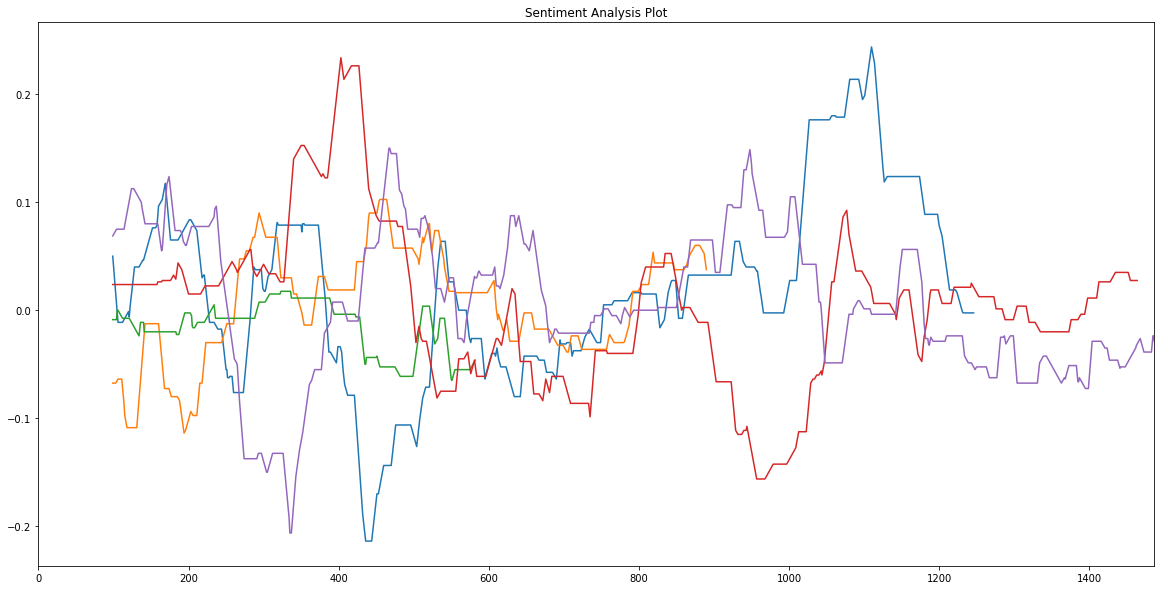

In [64]:
pd.Series(sentiAnalysis(docList[0])).rolling(100).mean().plot(figsize=(20,10))
pd.Series(sentiAnalysis(docList[1])).rolling(100).mean().plot(figsize=(20,10))
pd.Series(sentiAnalysis(docList[2])).rolling(100).mean().plot(figsize=(20,10))
pd.Series(sentiAnalysis(docList[3])).rolling(100).mean().plot(figsize=(20,10))
pd.Series(sentiAnalysis(docList[4])).rolling(100).mean().plot(figsize=(20,10), title='Sentiment Analysis Plot')

2. In this part, I will analyze the narratives and sentiments of these tales with the sentiment analysis that has been done:

Generally speaking, the use of the first person “I” will bring the readers closer to the characters in the novel, and will show the inner thought of the character “I” to the greatest extent; in contrast, the third person narrative is more objective and can show More people's psychological activities and feelings, but also widened the distance between readers and stories, lacking an immersive experience.

Oscar Wilde believes that the first person narrative will be influenced by the writer's personal feelings, causing the writer to lose objectivity. The genre of fairy tales just gave him an opportunity, and the use of the third person can make him objectively deal with the problems he faced.

But unlike the third-person narrative of the omniscience of the general novel, Wilde's fairy tale uses a lot of direct quotation dialogue in verbal expression, which makes the narrative perspective change constantly, and makes the story have multi-directional and multi-level meanings. For example, in "Nightingale and Rose", the narrative perspective of the article changes from the opening of the young student to the nightingale, and then continuously switches between nightingales and lizards, butterflies, daisies, roses, oaks, etc., and finally the perspective turns back to the students. With multiple perspectives, Wilde shows the different attitudes of different characters towards love, life and matters. As mentioned above in the 'motif' part, these bizarrely urbane animals and plants express unattractive sentiments, and the result is a series of ugly ideas spoken from the mouths of nature's most beautiful creation. Here the reversed sentiments are so ironic that Wilde succeeded in using it to undermine many stereotypes of the Victorian era. 


In [75]:
tale = "".join(tales)
talesTokens = nltk.word_tokenize(tale.lower())
talesTags = nltk.pos_tag(talesTokens)
#This functions looks for pairs like 'as beautiful as'
def asJJas(pairs):
    matches = []
    for i,pair in enumerate(pairs):
        word = pair[0]
        pos = pair[1]
        if i<len(pairs)-4:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextNextWord = pairs[i+3][0]
            nextNextNextNextWord = pairs[i+4][0]
            nextPos = pairs[i+1][1]
            nextNextPos = pairs[i+2][1]
            if (word == "as" or word == "so")and nextPos == "JJ" and nextNextWord == "as":
                matches.append([word, nextWord, nextNextWord, nextNextNextWord, nextNextNextNextWord])
    return matches       

In [ ]:
asJJas(talesTags)

3. In this chapter, I will do some analysis to in the rhetoric and format aspect of Wilde's tales

1). 'as JJ as'

We can tell from the result that  this rhetorical ornamantation is commonly used in stories. It is worth noting that the three in the middle separately with 'white', 'yellow' and 'red' are from "The Nightingale and The Rose". In these three episodes, the narrative elements such as characters, places, purposes, and results are basically the same, even the sentence structure and rhetorical techniques are consistent. For example, the three roses are answered with “My roses are white”. /yellow/red, as white /yellow /red as..., and whiter/yellower/redder than...". This three-part narrative not only makes the plot of the article more compact, but also adds a sense of beauty to the form.
 

In [67]:
def wandw(pairs):
    matches = []
    for i,pair in enumerate(pairs):
        word = pair[0]
        pos = pair[1]
        if i<len(pairs)-2:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextPos = pairs[i+1][1]
            nextNextPos = pairs[i+2][1]
            if word == nextNextWord and (pos == "NN" or pos == "JJR") and nextWord == "and" :
                matches.append([word, nextWord, nextNextWord])
    return matches       

In [68]:
wandw(talesTags)

[['round', 'and', 'round'],
 ['colder', 'and', 'colder'],
 ['deeper', 'and', 'deeper'],
 ['louder', 'and', 'louder'],
 ['wilder', 'and', 'wilder'],
 ['fainter', 'and', 'fainter'],
 ['round', 'and', 'round'],
 ['worse', 'and', 'worse'],
 ['round', 'and', 'round']]

2). 'JJR and JJR'

Here, the rhythm of Wilde's fairy tales is more apparent, making them look as beautiful as poetry.

On the basis of simple sentences, Wilde uses repeated and inverted sentences in every fairy tale. For example, in "Happy Prince", the simple sentence "Swallow, Swallow, little Swallow" is repeated seven times, which not only adds some sense of the poetry and rhythm to the text, but also links the main plot of the full text, emphasizing the importance of the little swallow. 

In "The Nightingale and the Rose", Wilde used four inverted sentences to describe the pain and singing of the nightingale, "...louder and louder grew her song....Bitter and bitter was the pain, and wilder and wilder grew her song.... Fainter and fainter grew her song... The use of inverted sentences on the one hand shows the process of the nightingale's singing from high to weak as the life fades away, and on the other hand emphasizes the night sacrifice's self-sacrifice and unrequited love. The variety of sentence patterns makes Wilde's writing style a poetic and aesthetic feature.

4. Conclusion

Oscar Wilde's fairy tale not only breaks the fixed pattern of traditional fairy tale creation from the forms of rhetoric and narrative, but also shows his pursuit of beauty and art. His works also transform the experience of things and real life into aesthetic existence. such as the tragedy of death and the morality of characters, as a kind of evaluation with good content, namely pure love and compassion, self-sacrifice spirit, ideals for the benefit of mankind, etc. Therefore, the combination of these two kinds of beauty makes Wilde's fairy tales show a unique style, which also makes them have the supreme ‘spiritual value’.


Bibliography

1.Wilde, Oscar. The happy prince and other tales. Pan Macmillan, 1997.

2.Willoughby, Guy. Art and Christhood: The Aesthetics of Oscar Wilde. Fairleigh Dickinson Univ Press, 1993.

3.Jones, Justin T. "Morality's Ugly Implications in Oscar Wilde's Fairy Tales." Studies in English Literature, 1500-1900 (2011): 883-903.